
# Project: Analysis of no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The chosen dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of haracteristics about the patient are included in each row.
>
> **The questions we will answer through the following analysis:**
> 1. Which gender is more likely to not show up to an appointment ?
> 2. What ages are most likely to not show up to an appointment ?
> 3. Are patients that receive SMS are more likely to show up ?
> 4. Which day of the week patients are most likely to not show up an appointment ?
> 5. Which medical condition is causing patients not to show up for appointments ?


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [99]:
# loading data, use head() to get preview of the dataset
df = pd.read_csv('noshowappointments-dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [100]:
# check for null values and explore data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
# get the size of the dataset
df.shape

(110526, 18)

In [101]:
# create satistical summary of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [102]:
# check count of no-shows
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [103]:
# check for duplicates
sum(df.duplicated())

0

In [194]:
df.nunique()

PatientId            62298
AppointmentID       110526
Gender                   2
ScheduledDay        103548
AppointmentDay          27
Age                    103
Neighbourhood           81
Scholarship              2
Hypertension             2
Diabetes                 2
Alcoholism               2
Handicap                 5
SMS_received             2
No-show                  2
appoint_day             24
appoint_time             1
schedule_day            31
schedule_time          860
schedule_weekday         6
schedule_month           8
appoint_weekday          6
appoint_month            3
dtype: int64

### Data Cleaning

In [168]:
# rename columns to correct spelling mistakes
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap'}, inplace = True)

In [104]:
# convert to datetime formats for easier manipulation from object type to datetime
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)

In [106]:
# make sure the type is converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [ ]:
def extract_date():
    # Extract the weekday, month for appointment and schedule day
    # The day of the week with Monday=0, Sunday=6
    df['schedule_day'] = df['ScheduledDay'].dt.day
    df['schedule_weekday'] = df['ScheduledDay'].dt.dayofweek
    df['schedule_month'] = df['ScheduledDay'].dt.month
    df['schedule_time'] = df['ScheduledDay'].dt.strftime('%H:%M')

    df['appoint_day'] = df['AppointmentDay'].dt.day
    df['appoint_weekday'] = df['AppointmentDay'].dt.dayofweek
    df['appoint_month'] = df['AppointmentDay'].dt.month

In [157]:
extract_date()

In [158]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No-show,appoint_day,appoint_time,schedule_day,schedule_time,schedule_weekday,schedule_month,appoint_weekday,appoint_month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,No,29,00:00,29,18:38,4,4,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,No,29,00:00,29,16:08,4,4,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,No,29,00:00,29,16:19,4,4,4,4


In [110]:
# check if false values for ages under 0
df.query('Age < 0').count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
appoint_day       1
appoint_time      1
schedule_day      1
schedule_time     1
dtype: int64

In [111]:
# drop row with age < 0
df.drop(df[(df.Age < 0)].index, inplace = True)

In [112]:
df.query('Age < 0').count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
appoint_day       0
appoint_time      0
schedule_day      0
schedule_time     0
dtype: int64

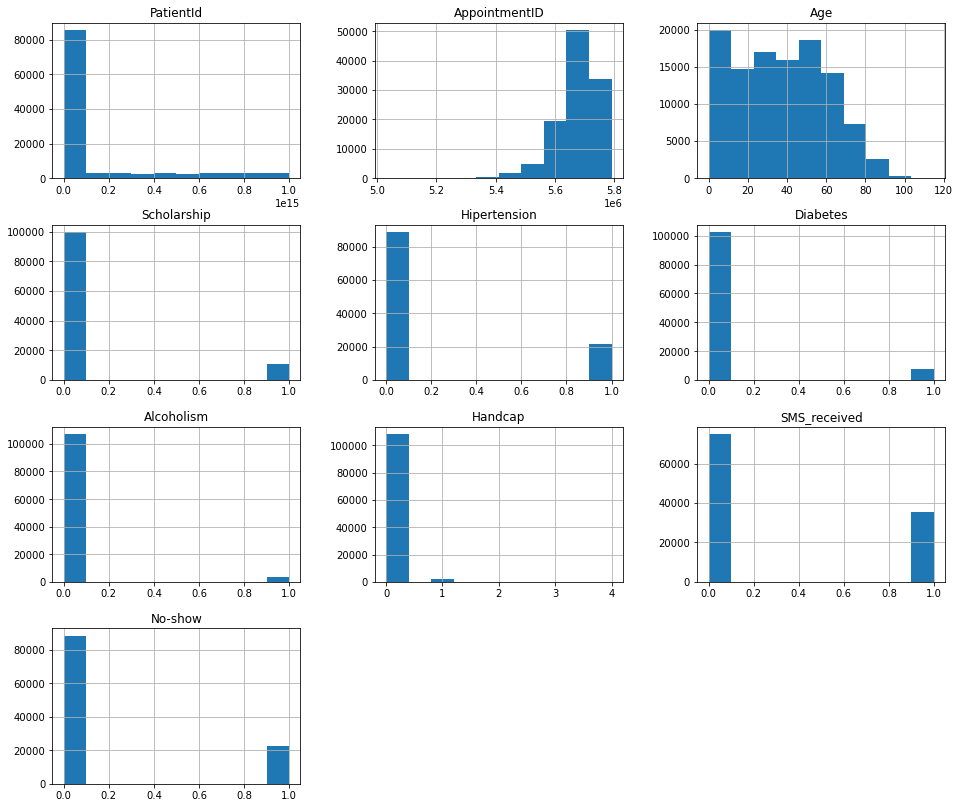

In [77]:
# explore numeric data with histograms
df.hist(figsize=(16,14));

<AxesSubplot:>

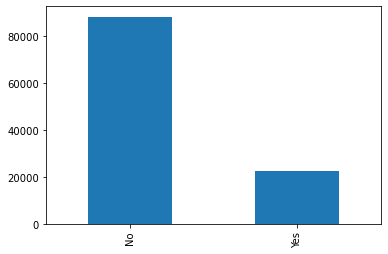

In [165]:
# explore difference in show and no-show 
df['No-show'].value_counts().plot(kind='bar')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PatientId         110526 non-null  float64       
 1   AppointmentID     110526 non-null  int64         
 2   Gender            110526 non-null  object        
 3   ScheduledDay      110526 non-null  datetime64[ns]
 4   AppointmentDay    110526 non-null  datetime64[ns]
 5   Age               110526 non-null  int64         
 6   Neighbourhood     110526 non-null  object        
 7   Scholarship       110526 non-null  int64         
 8   Hypertension      110526 non-null  int64         
 9   Diabetes          110526 non-null  int64         
 10  Alcoholism        110526 non-null  int64         
 11  Handicap          110526 non-null  int64         
 12  SMS_received      110526 non-null  int64         
 13  No-show           110526 non-null  object        
 14  appo

#### Create a Correlation Heatmap to understand relationships between variables

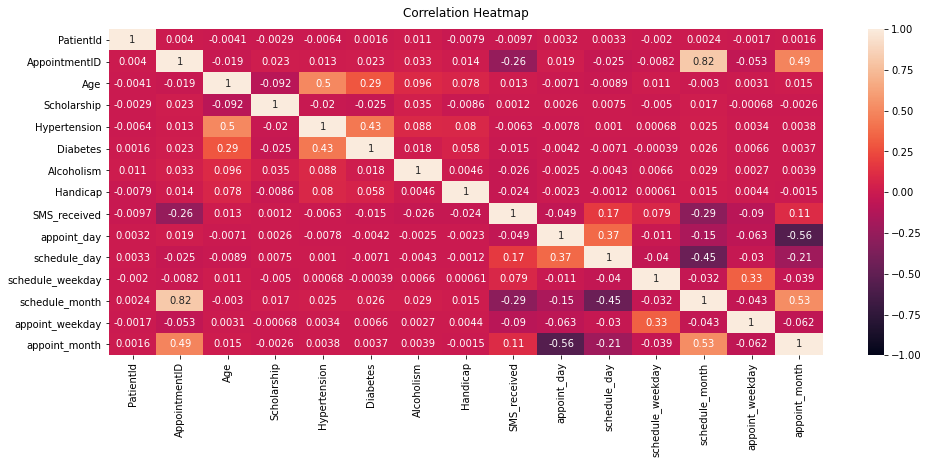

In [240]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- We can interpret from the heatmap that there could be a correlation between age and different medical conditions that could be worth exploring

## Exploratory Data Analysis
Answering the questions I have posed in the beginning of the analysis

### 1. Which gender is more likely to not show up to an appointment ?

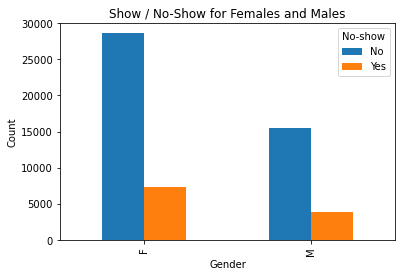

In [233]:
fig, ax = plt.subplots()
gender = pd.crosstab(df['Gender'],df['No-show'])
gender.div(gender.count(1), axis=0).plot(kind="bar",  ax = ax);
ax.set_title("Show / No-Show for Females and Males")
plt.ylabel('Count');

#### - There is not much of difference with gender in having the status with Show/NoShow

### 2. What ages are most likely to not show up to an appointment ?

Text(0.5, 1.0, 'Show / No-Show for mean ages')

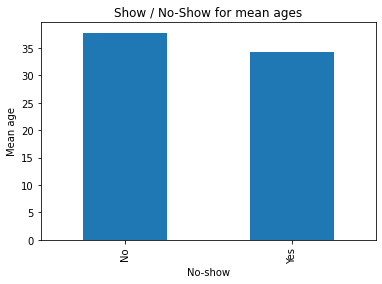

In [206]:
fig, ax = plt.subplots()
df.groupby('No-show')['Age'].mean().plot.bar()
plt.ylabel('Mean age');
ax.set_title("Show / No-Show for mean ages")

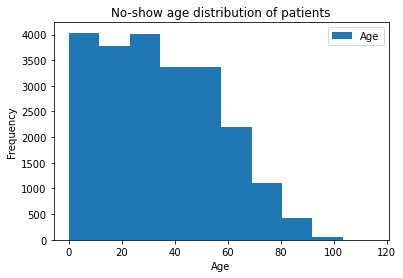

In [225]:
# age distribution for only No-show = yes
df_Noshow = df[df['No-show']  == "Yes"]
df_Noshow.plot(kind = "hist",y = "Age") 
plt.title('No-show age distribution of patients')
plt.xlabel('Age');

#### - Patients with younger mean age are more likely to not show up to their appointment (by small difference)

### 3. Are patients that receive SMS more likely to show up ?

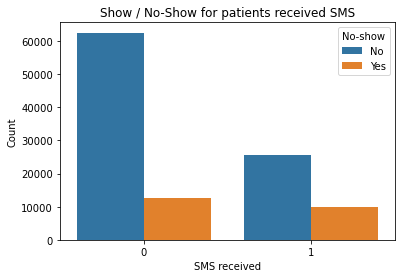

In [204]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'No-show', data = df)
SMS_recieved.set_title('Show / No-Show for patients received SMS')
plt.xlabel('SMS received')
plt.ylabel('Count')
plt.show()

#### - It can be inferred that receiving SMS have increased the shows since no-shows are very close for SMS recevied and none SMS received even though the total count is way less for SMS recevied

### 4. Which day of the week patients are most likely to not show up an appointment ?

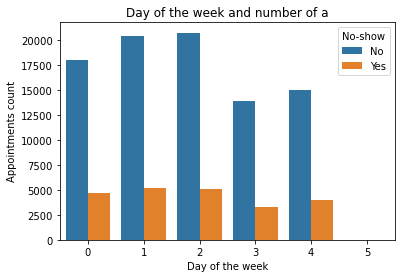

In [198]:
app_weekday = sns.countplot(x = 'appoint_weekday', hue = 'No-show', data = df)
app_weekday.set_title('Day of the week and number of appointments')
plt.xlabel('Day of the week')
plt.ylabel('Appointments count')
plt.show()
#The day of the week with Monday=0, Sunday=6

#### - We can observe that largest number of visits happen during the week rather than weekends, and Monday, Tuesday, and Wednesday are the busiest

### 4. Which medical condition is causing patients not to show up for appointments ?

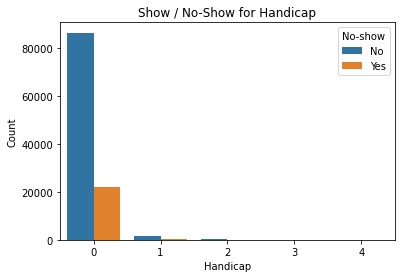

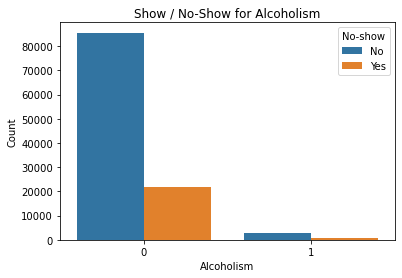

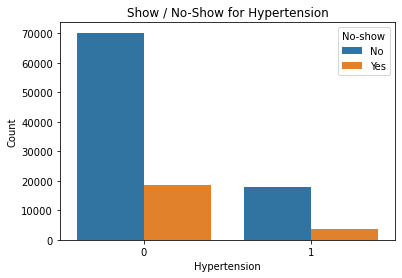

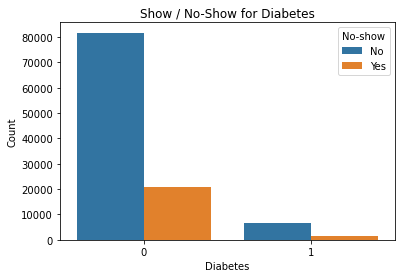

In [201]:
iter_cols = ['Handicap', 'Alcoholism', 'Hypertension', 'Diabetes']

for col in iter_cols:  
    sns.countplot(x = col, hue = 'No-show', data = df)
    plt.title('Show / No-Show for '+col)
    plt.ylabel('Count')
    plt.show()

#### - It can be inferred that patients suffering from hyprtension are more likely to not show up, since they have the highest count for no show up with a specific medical condition

## Conclusions

>### Limitations
> 
- Absence of additional medical conditions that could maybe cause patients not to show up.
- Handicap condition had 4 types, however type 2,3, and 4 had very small amount. So, this caused confusion is it an error or an actual severity of a condition.
- There was a minor entry error with age less than zero.
- Date had to be converted from object to datetime. 


>### Result
- We can conclude that no gender is more likely to miss an appoitment, although males had a higher count for no-shows.
- Only around 20% of patients do not show up for appointments.
- We can conclude that age is an important factor in predicting show/no-show for patients, since younger ages group missed more appointments.
- We can see that sending SMS messages is not essential but could increase probabilties of showing up.
- We can conlude that weekdays are busier that weekends, and no specific day has a relation to show/no-show status.
- We can see that patients suffering from Hypertension have the highest rate of no-show.

## Name: Lina Alkhodair